### Загрузка библиотек

In [34]:
import pandas as pd #Загрузка Пандас
import matplotlib.pyplot as plt #Загрузка Matplotlib Отрисовка графиков
from keras.utils import to_categorical
from tensorflow.keras import utils #Для to_categorical
import numpy as np #Загрузка Numpy
from keras.optimizers import Adam #Оптимизатор
from keras.models import Sequential, Model #Два варианты моделей
from keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM #Стандартные слои
from google.colab import files #Загрузка файлов
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики
# from tensorflow.keras.layers import CuDNNLSTM

# Рисовать графики сразу же
%matplotlib inline

In [14]:
!pip install -U keras

  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.15.0 which is incompatible.


In [44]:
pip install --upgrade tensorflow

  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
  Using cached tensorboard-2.15.1-py3-none-any.whl (5.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorf

### Работа с базой

In [2]:
#Загружаем файл базы
files.upload()
!ls

Saving 2017-2019 (1) (1).csv to 2017-2019 (1) (1) (1).csv
'2017-2019 (1) (1) (1).csv'  '2017-2019 (1) (1).csv'   sample_data


In [3]:
!ls #Проверяем загруженные файлы

'2017-2019 (1) (1) (1).csv'  '2017-2019 (1) (1).csv'   sample_data


In [4]:
#Считываем данные с помощью pandas
base_data = pd.read_csv('2017-2019 (1) (1).csv', sep= ';', date_parser=['Date'], encoding='cp1251' )

In [5]:
#Выводим пять первых строк
base_data.head(5)

,actual consumption,Data,week,winter,spring,summer,autumn,heating season,working day,peak load,...,"SNSS, MWt","CBPO_AKS_fact,pc","CBPO_AKS_fact, MWt","Structural units, MWt","Third Party Consumers, MWt",Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,260.491,01.01.17 1:00,7,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.116,1.032,NaN,NaN,NaN,NaN,NaN
1,262.182,01.01.17 2:00,7,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.114,1.008,NaN,NaN,NaN,NaN,NaN
2,261.896,01.01.17 3:00,7,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.114,1.002,NaN,NaN,NaN,NaN,NaN
3,261.992,01.01.17 4:00,7,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.114,0.997,NaN,NaN,NaN,NaN,NaN
4,262.555,01.01.17 5:00,7,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.114,1.014,NaN,NaN,NaN,NaN,NaN


In [6]:
#Выведем описательные статистики данных
base_data.describe()

,actual consumption,week,winter,spring,summer,autumn,heating season,working day,peak load,outdoor lighting,...,"SNSS, MWt","CBPO_AKS_fact,pc","CBPO_AKS_fact, MWt","Structural units, MWt","Third Party Consumers, MWt",Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
count,24744.000000,24744.000000,24744.000000,24744.000000,24744.000000,24744.000000,24744.000000,24744.000000,24744.000000,24744.000000,...,24744.000000,24744.0,24744.0,24744.000000,24744.000000,0.0,0.0,0.0,0.0,0.0
mean,249.387275,3.998060,0.231814,0.267701,0.267701,0.232784,0.662908,0.689662,0.171395,0.634942,...,1.714894,0.0,0.0,0.193277,0.881934,NaN,NaN,NaN,NaN,NaN
std,9.427163,2.000524,0.421999,0.442770,0.442770,0.422614,0.472726,0.462641,0.376861,0.481456,...,1.804791,0.0,0.0,0.099290,0.292498,NaN,NaN,NaN,NaN,NaN
min,209.254000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.036000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,243.107750,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.141000,0.652000,NaN,NaN,NaN,NaN,NaN
50%,249.369000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.360000,0.0,0.0,0.168000,0.893000,NaN,NaN,NaN,NaN,NaN
75%,257.325500,6.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,3.021000,0.0,0.0,0.210000,1.115000,NaN,NaN,NaN,NaN,NaN
max,270.173000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,8.309000,0.0,0.0,0.947000,1.644000,NaN,NaN,NaN,NaN,NaN


In [7]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24744 entries, 0 to 24743
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   actual consumption                     24744 non-null  float64
 1   Data                                   24744 non-null  object 
 2   week                                   24744 non-null  int64  
 3   winter                                 24744 non-null  int64  
 4   spring                                 24744 non-null  int64  
 5   summer                                 24744 non-null  int64  
 6   autumn                                 24744 non-null  int64  
 7   heating season                         24744 non-null  int64  
 8   working day                            24744 non-null  int64  
 9   peak load                              24744 non-null  int64  
 10  outdoor lighting                       24744 non-null  int64  
 11  in

In [8]:
base_data['wells, pcs'] = base_data['wells, pcs'].str.replace(' ', '').astype(float)

In [9]:
base_data.index = pd.to_datetime(base_data.Data)
base_data = base_data.drop(columns = ['Data', 'Oil preparation, MWt', 'Oil preparation, MWt.1',
                                      'Oil transportation, pc', 'Oil transportation, MWt',
                                      'Oil transportation, m3', 'Commercial water pumping, MWt',
                                      'Commercial water pumping, tons*103', 'OPRR, MWt',
                                      'SUBR-1, MWt', 'SUBR-3, MWt', 'CBPO_AKS_fact,pc',
                                      'CBPO_AKS_fact, MWt'], axis=1).astype(float)

In [10]:
#Выцепялем numpy значения .values
#И выводим нулевой
txt = base_data.values[0]
print(txt)

[ 2.60491e+02  7.00000e+00  1.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  1.00000e+00  0.00000e+00  0.00000e+00  1.00000e+00
  0.00000e+00 -1.62000e+01  4.42400e+03  1.18000e+02  1.00000e+01
  2.10000e+00  4.99000e+01  7.26000e+01  1.05790e+01  0.00000e+00
  5.10400e+00  2.70900e+00  0.00000e+00  4.21500e+00  0.00000e+00
  2.85900e+00  9.98000e-01  3.59000e+00  5.53000e+00  9.55100e+00
  5.98800e+00  5.98800e+00  0.00000e+00  1.16000e-01  1.03200e+00
          nan          nan          nan          nan          nan]


In [11]:
base_data = base_data.drop(columns = ['Unnamed: 48','Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
                                      'Unnamed: 52'], axis=1).astype(float)

In [12]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24744 entries, 2017-01-01 01:00:00 to 2019-10-29 00:00:00
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   actual consumption                     24744 non-null  float64
 1   week                                   24744 non-null  float64
 2   winter                                 24744 non-null  float64
 3   spring                                 24744 non-null  float64
 4   summer                                 24744 non-null  float64
 5   autumn                                 24744 non-null  float64
 6   heating season                         24744 non-null  float64
 7   working day                            24744 non-null  float64
 8   peak load                              24744 non-null  float64
 9   outdoor lighting                       24744 non-null  float64
 10  interior lighting                  

In [13]:
#Преобразование строк с числами в лист float
def strList2Float(lst):
  return [float(i) for i in lst]

#Загружаем выборку
def getData(df):
  values = df.values #Вытаскиваем значение из data frame
  data = [] #Создаём пустую базу

  #Проходим по всем строкам данных
  for v in values:
    currStr = v[0].split(sep=";") #Разбиваем на значения, раделитель - ;
    currStr = currStr[2:] #Отбрасываем два первых значения - в них даты
    currStr = strList2Float(currStr) #Превращаем оставшиеся значения из листа строк в лист float
    data.append(currStr) #Добавляем элемент в базу

  return data

#Получаем данные из файла
def getDataFromFile(fileName):
  df = pd.read_csv(fileName) #Считываем файл с помощью pandas
  return getData(df) #Возвращаем считанные данные из файла

In [14]:
data = base_data.copy() #Создаем копию базы
data = np.array(data) #Превращаем в numpy массив
data.shape

(24744, 35)

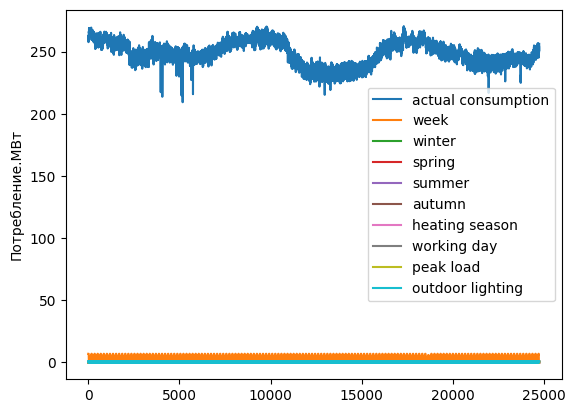

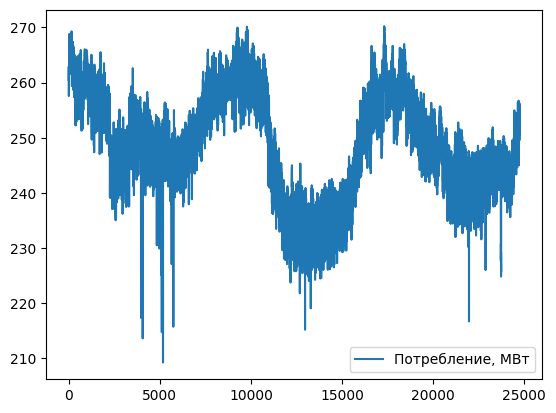

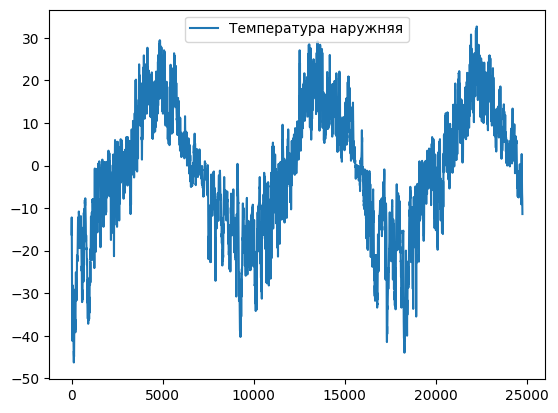

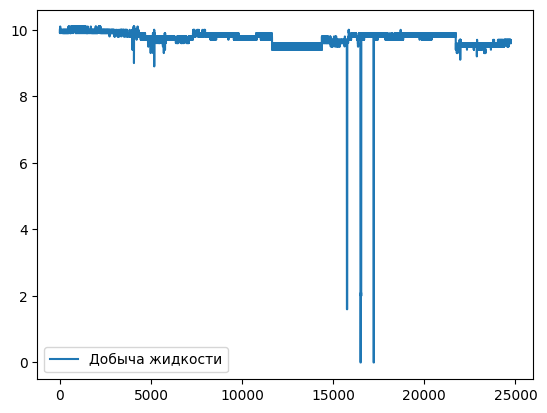

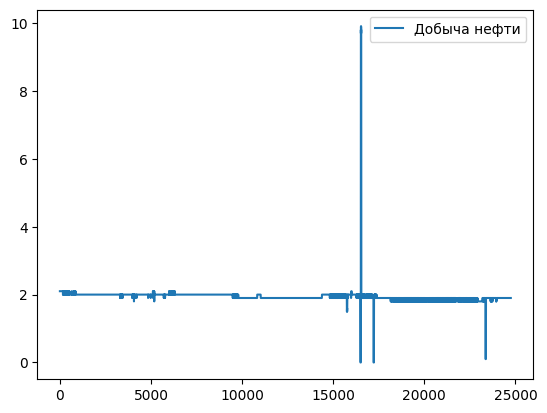

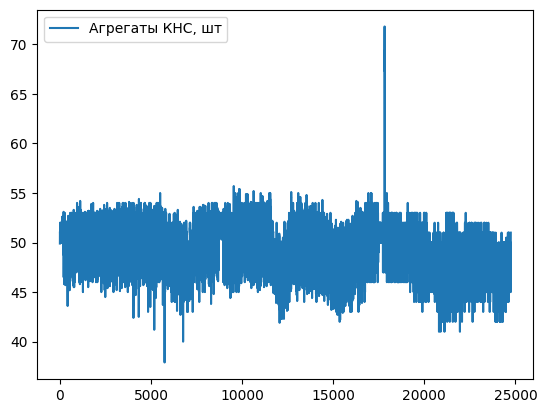

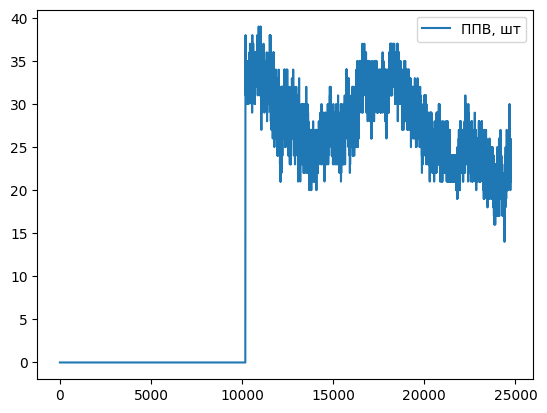

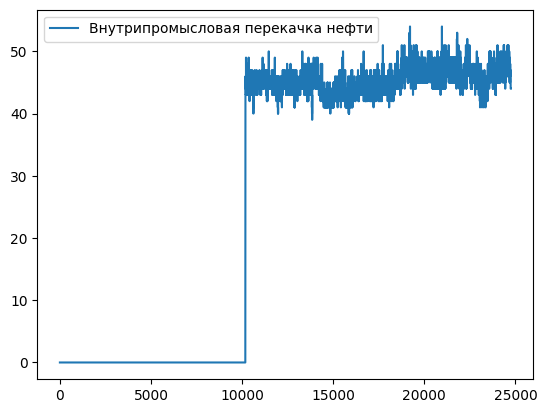

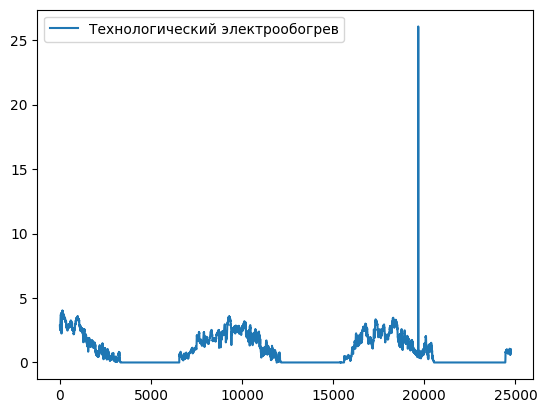

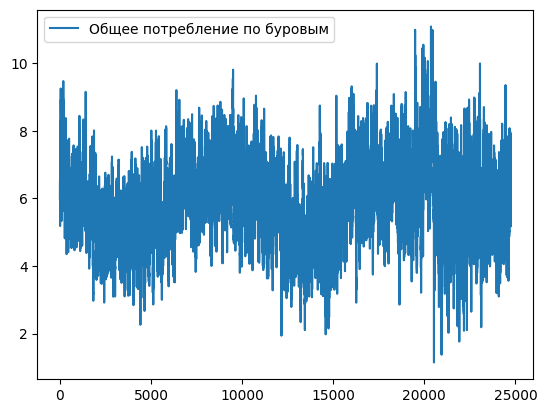

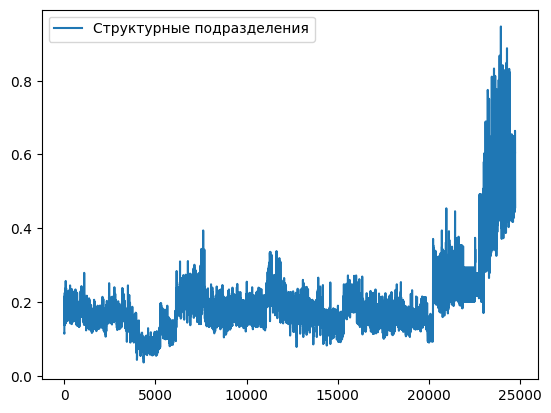

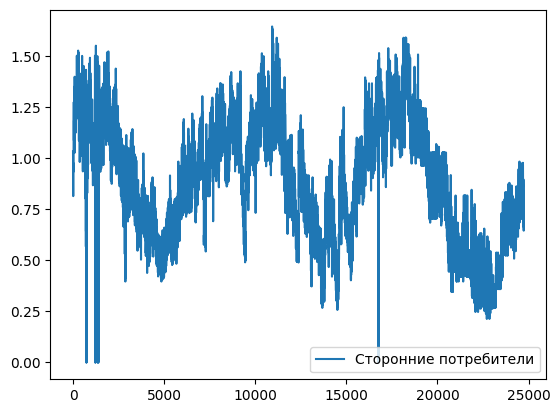

In [15]:
#Отображаем исходные от точки start и длинной step
start = 0 #С какой точки начинаем
step = data.shape[0] #Сколько точек отрисуем

#Заполняем текстовые названия каналов данных
chanelNames = ['actual consumption', 'week', 'winter', 'spring', 'summer', 'autumn', 'heating season',
               'working day', 'peak load', 'outdoor lighting', 'interior lighting', 'temperature',
               'wells, pcs', 'mechanical fluid recovery MWt', 'Fluid_production, tons*103',
               'Oil_production, tons*103', 'fact_aggregates_KNS,pc', 'fact_aggregates_KNS, MWt',
               'water injection, m3*103', 'PPW,ps', 'PPW,MWt', 'PPW, m3*103', 'Oilfield pumping, pc',
               'Oilfield pumping, MWt', 'Oilfield pumping, m3*103', 'Technological electrical heating, MWt',
               'Boiler work, MWt', 'GPPS, pc', 'GPPS, MWt', 'UVSING, MWt', '?SUBR, MWt', 'SUBR-2, MWt',
               'SNSS, MWt', 'Structural units, MWt', 'Third Party Consumers, MWt']

#Рисуем все графики данных
for i in range(10):
  #Отрисовываем часть данных
  #От начальной точки, до начальной точки + размер шага отрисовки
  plt.plot(data[start:start+step,i],
          label=chanelNames[i])
plt.ylabel('Потребление.МВт')
plt.legend()
plt.show()

#Канал Сторонние потребители
plt.plot(data[start:start+step,0], label="Потребление, МВт")
plt.legend()
plt.show()

#Канал Сторонние потребители
plt.plot(data[start:start+step,11], label="Температура наружняя")
plt.legend()
plt.show()

#Канал Сторонние потребители
plt.plot(data[start:start+step,14], label="Добыча жидкости")
plt.legend()
plt.show()

#Канал Сторонние потребители
plt.plot(data[start:start+step,15], label="Добыча нефти")
plt.legend()
plt.show()

#Канал Сторонние потребители
plt.plot(data[start:start+step,16], label="Агрегаты КНС, шт")
plt.legend()
plt.show()

#Канал Сторонние потребители
plt.plot(data[start:start+step,19], label="ППВ, шт")
plt.legend()
plt.show()

#Канал Сторонние потребители
plt.plot(data[start:start+step,22], label="Внутрипромысловая перекачка нефти")
plt.legend()
plt.show()

#Канал Сторонние потребители
plt.plot(data[start:start+step,25], label="Технологический электрообогрев")
plt.legend()
plt.show()

#Канал Сторонние потребители
plt.plot(data[start:start+step,30], label="Общее потребление по буровым")
plt.legend()
plt.show()

#Канал Сторонние потребители
plt.plot(data[start:start+step,33], label="Структурные подразделения")
plt.legend()
plt.show()

#Канал Сторонние потребители
plt.plot(data[start:start+step,34], label="Сторонние потребители")
plt.legend()
plt.show()

## Функция загрузки данных

In [16]:
#Функция "раскусывания" данных для временных рядов
#data - данные
#xLen - размер фрема, по которому предсказываем
#xChannels - лист, номера каналов, по которым делаем анализ
#yChannels - лист, номера каналов, которые предсказываем
#stepsForward - на сколько шагов предсказываем в будутее
#если 0 - то на 1 шаг, можно использовать только при одном канале, указанном в yChannels
#xNormalization - нормализация входных каналов, 0 - нормальное распределение, 1 - к отрезку [0;1]
#yNormalization - нормализация прогнозируемых каналов, 0 - нормальное распределение, 1 - к отрезку [0;1]
#returnFlatten - делать ли одномерный вектор на выходе для Dense сетей
#valLen - сколько примеров брать для проверочной выборки (количество для обучающей посчитается автоматиески)
#convertToDerivative - bool, преобразовывали ли входные сигналы в производную
def getXTrainFromTimeSeries(data, xLen, xChannels, yChannels, stepsForward, xNormalization, yNormalization, returnFlatten, valLen, convertToDerivative):

  #Если указано превращение данных в производную
  #То вычитаем поточечно из текущей точки предыдущую
  if (convertToDerivative):
    data = np.array([(d[1:]-d[:-1]) for d in data.T]).copy().T

  #Выбираем тип нормализации x
  #0 - нормальное распределение
  #1 - нормирование до отрезка 0-1
  if (xNormalization == 0):
    xScaler = StandardScaler()
  else:
    xScaler = MinMaxScaler()

  #Берём только те каналы, которые указаны в аргументе функции
  xData = data[:,xChannels]
  #Обучаем нормировщик
  xScaler.fit(xData)
  #Нормируем данные
  xData = xScaler.transform(xData)

  #Выбираем тип нормализации y
  #0 - нормальное распределение
  #1 - нормирование до отрезка 0-1
  if (yNormalization == 0):
    yScaler = StandardScaler()
  else:
    yScaler = MinMaxScaler()

  #Берём только те каналы, которые указаны в аргументе функции
  yData = data[:,yChannels]
  #Обучаем нормировщик
  yScaler.fit(yData)
  #Нормируем данные
  yData = yScaler.transform(yData)

  #Формируем xTrain
  #Раскусываем исходный ряд на куски xLen с шагом в 1
  xTrain = np.array([xData[i:i+xLen, xChannels] for i in range(xData.shape[0]-xLen-1-stepsForward)])

  #Формируем yTrain
  #Берём stepsForward шагов после завершения текущего x
  if (stepsForward > 0):
    yTrain = np.array([yData[i+xLen:i+xLen+stepsForward, yChannels] for i in range(yData.shape[0]-xLen-1-stepsForward)])
  else:
    yTrain = np.array([yData[i+xLen+stepsForward, yChannels] for i in range(yData.shape[0]-xLen-1-stepsForward)])

  #Делаем reshape y в зависимости от того
  #Прогнозируем на 1 шаг вперёдили на несколько
  if (stepsForward == 0):
    if ((len(yChannels) == 1)):
      yTrain = yTrain.reshape(yTrain.shape[0], 1)
  else:
      yTrain = yTrain.reshape(yTrain.shape[0], stepsForward)

  #Расчитываем отступ между обучающими о проверочными данными
  #Чтобы они не смешивались
  xTrainLen = xTrain.shape[0]
  bias = xLen + stepsForward + 2

  #Берём из конечной части xTrain проверочную выборку
  xVal = xTrain[xTrainLen-valLen:]
  yVal = yTrain[xTrainLen-valLen:]
  #Оставшуюся часть используем под обучающую выборку
  xTrain = xTrain[:xTrainLen-valLen-bias]
  yTrain = yTrain[:xTrainLen-valLen-bias]

  #Если в функцию передали вернуть flatten сигнал (для Dense сети)
  #xTrain и xVal превращаем в flatten
  if (returnFlatten > 0):
    xTrain = np.array([x.flatten() for x in xTrain])
    xVal = np.array([x.flatten() for x in xVal])

  return (xTrain, yTrain), (xVal, yVal), (xScaler, yScaler)

In [17]:
#Формируем параметры загрузки данных
xLen = 300 #Анализируем по 300 прошедшим точкам
stepsForward = 0 #Предсказываем на 1 шаг вперёд
xChannels = range(data.shape[1]) #Используемвсе входные каналы
yChannels = [0] #Предказываем только open канал
xNormalization = 0 #Нормируем входные каналы стандартным распределением
yNormalization = 0 #Нормируем выходные каналы стандартным распределением
valLen = 30000 #Используем 30.000 записей для проверки
returnFlatten = 1 #Вернуть одномерные векторы
convertToDerivative = 0 #Не превращать в производную

#Загружаем данные
(xTrain, yTrain), (xVal, yVal), (xScaler, yScaler) = getXTrainFromTimeSeries(data, xLen, xChannels, yChannels, stepsForward, xNormalization, yNormalization, returnFlatten, valLen, convertToDerivative)

#Выводим размеры данных для проверки
print(xTrain.shape)
print(yTrain.shape)
print(xVal.shape)
print(yVal.shape)

(18584, 10500)
(18584, 1)
(5557, 10500)
(5557, 1)


In [18]:
#Функция рассчитываем результаты прогнозирования сети
#В аргументы принимает сеть (currModel) и проверочную выборку
#Выдаёт результаты предсказания predVal
#И правильные ответы в исходной размерности yValUnscaled (какими они были до нормирования)
def getPred(currModel, xVal, yVal, yScaler):
  #Предсказываем ответ сети по проверочной выборке
  #И возвращаем исходны масштаб данных, до нормализации
  predVal = yScaler.inverse_transform(currModel.predict(xVal))
  yValUnscaled = yScaler.inverse_transform(yVal)

  return (predVal, yValUnscaled)

#Функция визуализирует графики, что предсказала сеть и какие были правильные ответы
#start - точка с которой начинаем отрисовку графика
#step - длина графика, которую отрисовываем
#channel - какой канал отрисовываем
def showPredict(start, step, channel, predVal, yValUnscaled):
  plt.plot(predVal[start:start+step, channel],
           label='Прогноз')
  plt.plot(yValUnscaled[start:start+step, channel],
           label='Базовый ряд')
  plt.xlabel('Время')
  plt.ylabel('Значение Close')
  plt.legend()
  plt.show()

#Функция расёта корреляции дух одномерных векторов
def correlate(a, b):
  #РАссчитываем основные показатели
  ma = a.mean() #Среднее значение первого вектора
  mb = b.mean() #Среднее значение второго вектора
  mab = (a*b).mean() #Среднее значение произведения векторов
  sa = a.std() #Среднеквадратичное отклонение первого вектора
  sb = b.std() #Среднеквадратичное отклонение второго вектора

  #Рассчитываем корреляцию
  val = 0
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb)/(sa*sb)
  return val

#Функция рисуем корреляцию прогнозированного сигнала с правильным
#Смещая на различное количество шагов назад
#Для проверки появления эффекта автокорреляции
#channels - по каким каналам отображать корреляцию
#corrSteps - на какое количество шагов смещать сигнал назад для рассчёта корреляции
def showCorr(channels, corrSteps, predVal, yValUnscaled):
  #Проходим по всем каналам
  for ch in channels:
    corr = [] #Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно
    yLen = yValUnscaled.shape[0] #Запоминаем размер проверочной выборки

    #Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      #Получаем сигнал, смещённый на i шагов назад
      #predVal[i:, ch]
      #Сравниваем его с верными ответами, без смещения назад
      #yValUnscaled[:yLen-i,ch]
      #Рассчитываем их корреляцию и добавляем в лист
      corr.append(correlate(yValUnscaled[:yLen-i,ch], predVal[i:, ch]))

    #Отображаем график коррелций для данного шага
    plt.plot(corr, label='предсказание на ' + str(ch+1) + ' шаг')

  plt.xlabel('Время')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()

In [19]:
xTrain

array([[ 1.17786747e+00,  1.50060681e+00,  1.82038664e+00, ...,
        -9.50208985e-01,  3.74945300e-02,  1.42932562e+00],
       [ 1.35724636e+00,  1.50060681e+00,  1.82038664e+00, ...,
        -9.50208985e-01,  7.27943217e-03,  1.31308310e+00],
       [ 1.32690789e+00,  1.50060681e+00,  1.82038664e+00, ...,
        -9.50208985e-01, -7.32941620e-02,  1.28573191e+00],
       ...,
       [ 5.68127721e-01,  9.69697454e-04,  1.82038664e+00, ...,
        -9.50208985e-01, -5.36592328e-01,  8.95977559e-01],
       [ 3.94370988e-01,  9.69697454e-04,  1.82038664e+00, ...,
        -9.50208985e-01, -6.27237622e-01,  9.47261026e-01],
       [ 4.80825040e-01,  9.69697454e-04,  1.82038664e+00, ...,
        -9.50208985e-01, -7.27954614e-01,  7.66059441e-01]])

## Полносвязная сеть

Epoch 1/40
930/930 [==============================] - 20s 19ms/step - loss: 1.5917 - val_loss: 0.8541
Epoch 2/40
930/930 [==============================] - 16s 17ms/step - loss: 0.7465 - val_loss: 0.6127
Epoch 3/40
930/930 [==============================] - 16s 17ms/step - loss: 0.6820 - val_loss: 0.7956
Epoch 4/40
930/930 [==============================] - 15s 17ms/step - loss: 0.5495 - val_loss: 1.3860
Epoch 5/40
930/930 [==============================] - 16s 17ms/step - loss: 0.3241 - val_loss: 1.5943
Epoch 6/40
930/930 [==============================] - 15s 17ms/step - loss: 0.3058 - val_loss: 0.4089
Epoch 7/40
930/930 [==============================] - 15s 16ms/step - loss: 0.2022 - val_loss: 0.1881
Epoch 8/40
930/930 [==============================] - 17s 18ms/step - loss: 0.2026 - val_loss: 0.1319
Epoch 9/40
930/930 [==============================] - 15s 16ms/step - loss: 0.1287 - val_loss: 0.2434
Epoch 10/40
930/930 [==============================] - 15s 16ms/step - loss: 0.096

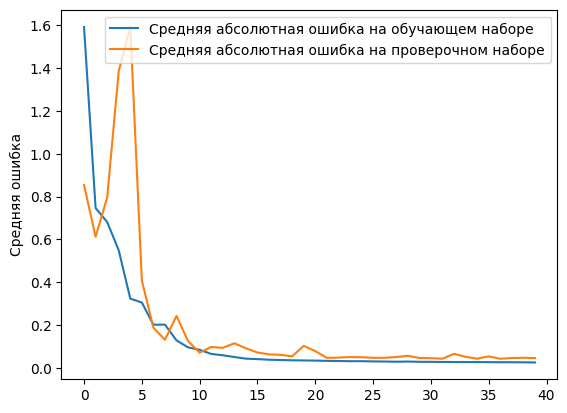

In [38]:
#Создаём нейронку
modelD = Sequential()
modelD.add(Dense(100, input_dim = xTrain.shape[1], activation="linear"))
modelD.add(Dense(yTrain.shape[1], activation="linear"))

#Компилируем
modelD.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))

#Запускаем обучение
history = modelD.fit(xTrain,
                    yTrain,
                    epochs=40,
                    batch_size=20,
                    verbose=1,
                    validation_data=(xVal, yVal))

#Выводим графики
plt.plot(history.history['loss'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
# Сохраняем обученную модель
modelD.save('modelD.pkl')

## Визуализация результатов

In [69]:
#Функция рассчитываем результаты прогнозирования сети
#В аргументы принимает сеть (currModel) и проверочную выборку
#Выдаёт результаты предсказания predVal
#И правильные ответы в исходной размерности yValUnscaled (какими они были до нормирования)
def getPred(currModel, xVal, yVal, yScaler):
  #Предсказываем ответ сети по проверочной выборке
  #И возвращаем исходны масштаб данных, до нормализации
  predVal = yScaler.inverse_transform(currModel.predict(xVal))
  yValUnscaled = yScaler.inverse_transform(yVal)

  return (predVal, yValUnscaled)

#Функция визуализирует графики, что предсказала сеть и какие были правильные ответы
#start - точка с которой начинаем отрисовку графика
#step - длина графика, которую отрисовываем
#channel - какой канал отрисовываем
def showPredict(start, step, channel, predVal, yValUnscaled):
  plt.plot(predVal[start:start+step, channel],
           label='Прогноз')
  plt.plot(yValUnscaled[start:start+step, channel],
           label='фактическое потребление')
  plt.xlabel('Время')
  plt.ylabel('потребление электроэнергии')
  plt.legend()
  plt.show()

#Функция расёта корреляции двух одномерных векторов
def correlate(a, b):
  #Рассчитываем основные показатели
  ma = a.mean() #Среднее значение первого вектора
  mb = b.mean() #Среднее значение второго вектора
  mab = (a*b).mean() #Среднее значение произведения векторов
  sa = a.std() #Среднеквадратичное отклонение первого вектора
  sb = b.std() #Среднеквадратичное отклонение второго вектора

  #Рассчитываем корреляцию
  val = 0
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb)/(sa*sb)
  return val

#Функция рисуем корреляцию прогнозированного сигнала с правильным
#Смещая на различное количество шагов назад
#Для проверки появления эффекта автокорреляции
#channels - по каким каналам отображать корреляцию
#corrSteps - на какое количество шагов смещать сигнал назад для рассчёта корреляции
def showCorr(channels, corrSteps, predVal, yValUnscaled):
  #Проходим по всем каналам
  for ch in channels:
    corr = [] #Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно
    yLen = yValUnscaled.shape[0] #Запоминаем размер проверочной выборки

    #Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      #Получаем сигнал, смещённый на i шагов назад
      #predVal[i:, ch]
      #Сравниваем его с верными ответами, без смещения назад
      #yValUnscaled[:yLen-i,ch]
      #Рассчитываем их корреляцию и добавляем в лист
      corr.append(correlate(yValUnscaled[:yLen-i,ch], predVal[i:, ch]))

    #Отображаем график коррелций для данного шага
    plt.plot(corr, label='предсказание на ' + str(ch+1) + ' шаг')

  plt.xlabel('Время')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()

In [40]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal, yVal, yScaler) #Прогнозируем данные

174/174 [==============================] - 2s 9ms/step


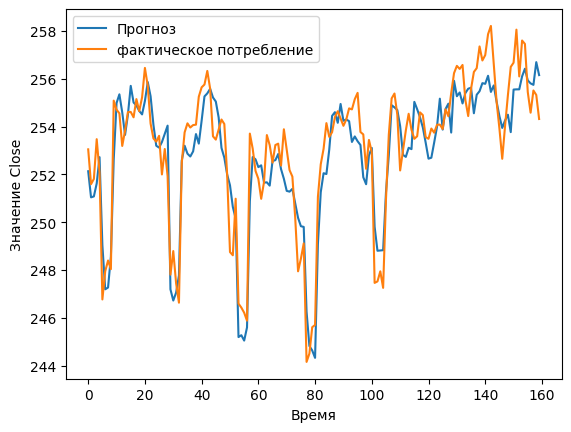

In [41]:
#Отображаем графики
showPredict(0, 160, 0, predVal, yValUnscaled)

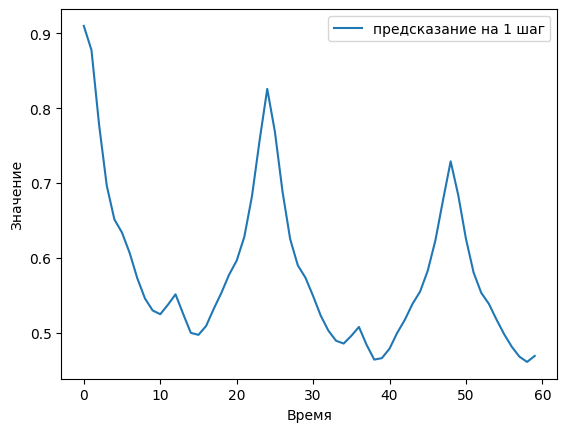

In [42]:
#Отображаем корреляцию
#Используем выходной канал - только open
#Проверяем корреляцию на глубину 60 шагов
showCorr([0], 60, predVal, yValUnscaled)

## Одномерная свёртка

In [61]:
#Формируем параметры загрузки данных
xLen = 400
stepsForward = 0
xChannels = range(data.shape[1])
yChannels = [0]
xNormalization = 0
yNormalization = 0
valLen = 30000
returnFlatten = 0 #Возвращаем двумерные данные для свёртки
convertToDerivative = 0

#Загружаем данные
(xTrain, yTrain), (xVal, yVal), (xScaler, yScaler) = getXTrainFromTimeSeries(data, xLen, xChannels, yChannels, stepsForward, xNormalization, yNormalization, returnFlatten, valLen, convertToDerivative)

#Выводим размеры данных для проверки
print(xTrain.shape)
print(yTrain.shape)
print(xVal.shape)
print(yVal.shape)

(18284, 400, 35)
(18284, 1)
(5657, 400, 35)
(5657, 1)


Epoch 1/20
915/915 [==============================] - 17s 17ms/step - loss: 0.4952 - val_loss: 0.2162
Epoch 2/20
915/915 [==============================] - 14s 16ms/step - loss: 0.1727 - val_loss: 0.1771
Epoch 3/20
915/915 [==============================] - 14s 15ms/step - loss: 0.1142 - val_loss: 0.2024
Epoch 4/20
915/915 [==============================] - 15s 16ms/step - loss: 0.0873 - val_loss: 0.2308
Epoch 5/20
915/915 [==============================] - 15s 16ms/step - loss: 0.0733 - val_loss: 0.1474
Epoch 6/20
915/915 [==============================] - 15s 17ms/step - loss: 0.0610 - val_loss: 0.1198
Epoch 7/20
915/915 [==============================] - 15s 16ms/step - loss: 0.0536 - val_loss: 0.1053
Epoch 8/20
915/915 [==============================] - 13s 14ms/step - loss: 0.0479 - val_loss: 0.1063
Epoch 9/20
915/915 [==============================] - 14s 15ms/step - loss: 0.0441 - val_loss: 0.1281
Epoch 10/20
915/915 [==============================] - 15s 16ms/step - loss: 0.040

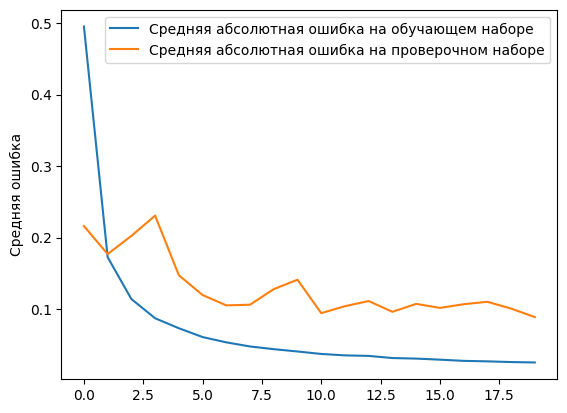

In [62]:
modelC = Sequential()

modelC.add(Conv1D(50, 5, input_shape = (xTrain.shape[1], xTrain.shape[2]), activation="linear"))
modelC.add(Flatten())
modelC.add(Dense(10, activation="linear"))
modelC.add(Dense(yTrain.shape[1], activation="linear"))

modelC.compile(loss="mse", optimizer=Adam(learning_rate=1e-4))

history = modelC.fit(xTrain,
                    yTrain,
                    epochs=20,
                    batch_size=20,
                    verbose=1,
                    validation_data=(xVal, yVal))

plt.plot(history.history['loss'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [66]:
# Сохраняем обученную модель
modelC.save('modelC.pkl')

In [63]:
#Прогнозируем данные текущей сетью
currModel = modelC
(predVal, yValUnscaled) = getPred(currModel, xVal, yVal, yScaler)

177/177 [==============================] - 2s 13ms/step


In [68]:
print(yValUnscaled)

[[252.067]
 [253.168]
 [254.492]
 ...
 [254.039]
 [254.877]
 [255.588]]


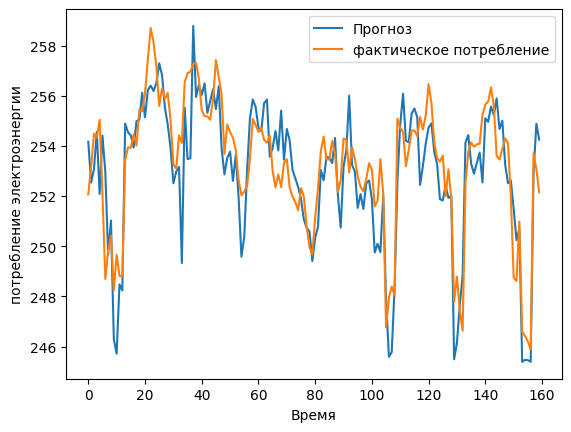

In [72]:
#Отображаем графики
showPredict(0, 160, 0, predVal, yValUnscaled)

## LSTM

In [60]:
modelL = Sequential()
modelL.add(LSTM(34, input_shape = ( xTrain.shape[0], xTrain.shape[1])))


#modelL.add(Flatten())
modelL.add(Dense(10, activation="linear"))
modelL.add(Dense(yTrain.shape[1], activation="linear"))

modelL.compile(loss="mse", optimizer=Adam(learning_rate=1e-5))

history = modelL.fit(xTrain[::34,:],
                    yTrain[::34,:],
                    epochs=10,
                    batch_size=20,
                    verbose=1,
                    validation_data=(xVal, yVal))

plt.plot(history.history['loss'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

Epoch 1/10


ValueError: ignored

In [74]:
print(xTrain.shape[0])

18284


In [75]:
#Прогнозируем данные текущей сетью
currModel = modelL
(predVal, yValUnscaled) = getPred(currModel, xVal, yVal, yScaler)

ValueError: ignored

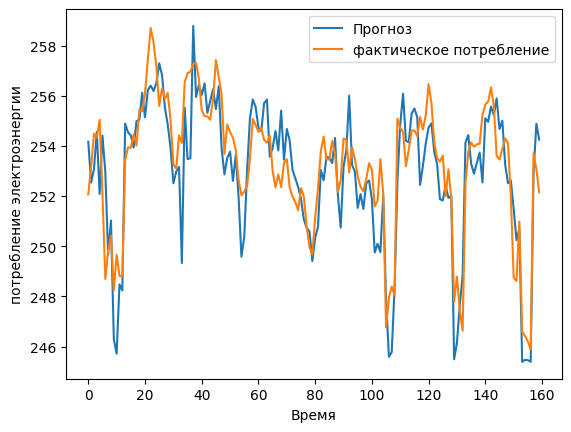

In [76]:
#Отображаем графики
showPredict(0, 160, 0, predVal, yValUnscaled)

In [1]:
#Отображаем корреляцию
showCorr([0], 10, predVal, yValUnscaled)

NameError: ignored

## ModelX

Сложная сеть из LSTM и Conv1D слоёв на старте и Dense слоёв в конце

In [ ]:
dataInput = Input(shape=(xTrain.shape[0], xTrain.shape[1]))

lstmWay = LSTM(10, return_sequences="True")(dataInput)
convWay = Conv1D(10, 5, activation="relu")(dataInput)

lstmConvWay = Conv1D(10, 5, activation="relu")(lstmWay)
convLstmWay = LSTM(10, return_sequences="True")(convWay)

lstmWay = LSTM(10, return_sequences="True")(lstmWay)
convWay = Conv1D(10, 5, activation="relu")(convWay)

lstmWay = Flatten()(lstmWay)
convWay = Flatten()(convWay)
lstmConvWay = Flatten()(lstmConvWay)
convLstmWay = Flatten()(convLstmWay)

finWay = concatenate([lstmWay, convWay, lstmConvWay, convLstmWay])
finWay = Dense(10, activation="linear")(finWay)
finWay = Dense(yTrain.shape[1], activation="linear")(finWay)

modelX = Model(dataInput, finWay)

modelX.compile(loss="mse", optimizer=Adam(learning_rate=1e-4))

history = modelX.fit(xTrain,
                    yTrain,
                    epochs=6,
                    batch_size=20,
                    verbose=1,
                    validation_data=(xVal, yVal))

plt.plot(history.history['loss'],
         label='Точность на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Точность на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelX
(predVal, yValUnscaled) = getPred(currModel, xVal, yVal, yScaler)

In [ ]:
#Отображаем графики
showPredict(0, 4000, 0, predVal, yValUnscaled)

In [ ]:
#Отображаем корреляцию
showCorr([0], 10, predVal, yValUnscaled)